# Pie Charts, Box Plots, Scatter Plots, and Bubble Plots

In [1]:
import numpy as np
import pandas as pd

In [2]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'],axis = 1 , inplace = True)

df_can.rename(columns = {'OdName':'Country','AreaName':'Continent','RegName':'Region'},inplace = True)

df_can['Total'] = df_can.sum(axis = 1)


<ipython-input-4-c53a3a57ffa6>:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis = 1)


In [5]:
df_can.set_index('Country',inplace = True)
years = list(map(int,range(1980,2014)))

# Visualizing Data using Matplotlib

In [6]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.7.1


Let's use a pie chart to explore the proportion (percentage) of new immigrants grouped by continents for the entire time period from 1980 to 2013.

In [7]:
df_continent = df_can.groupby('Continent',axis = 0).sum()
df_continent

<ipython-input-7-5e0b17de8d74>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_continent = df_can.groupby('Continent',axis = 0).sum()


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


In [13]:
df_continent.index

Index(['Africa', 'Asia', 'Europe', 'Latin America and the Caribbean',
       'Northern America', 'Oceania'],
      dtype='object', name='Continent')

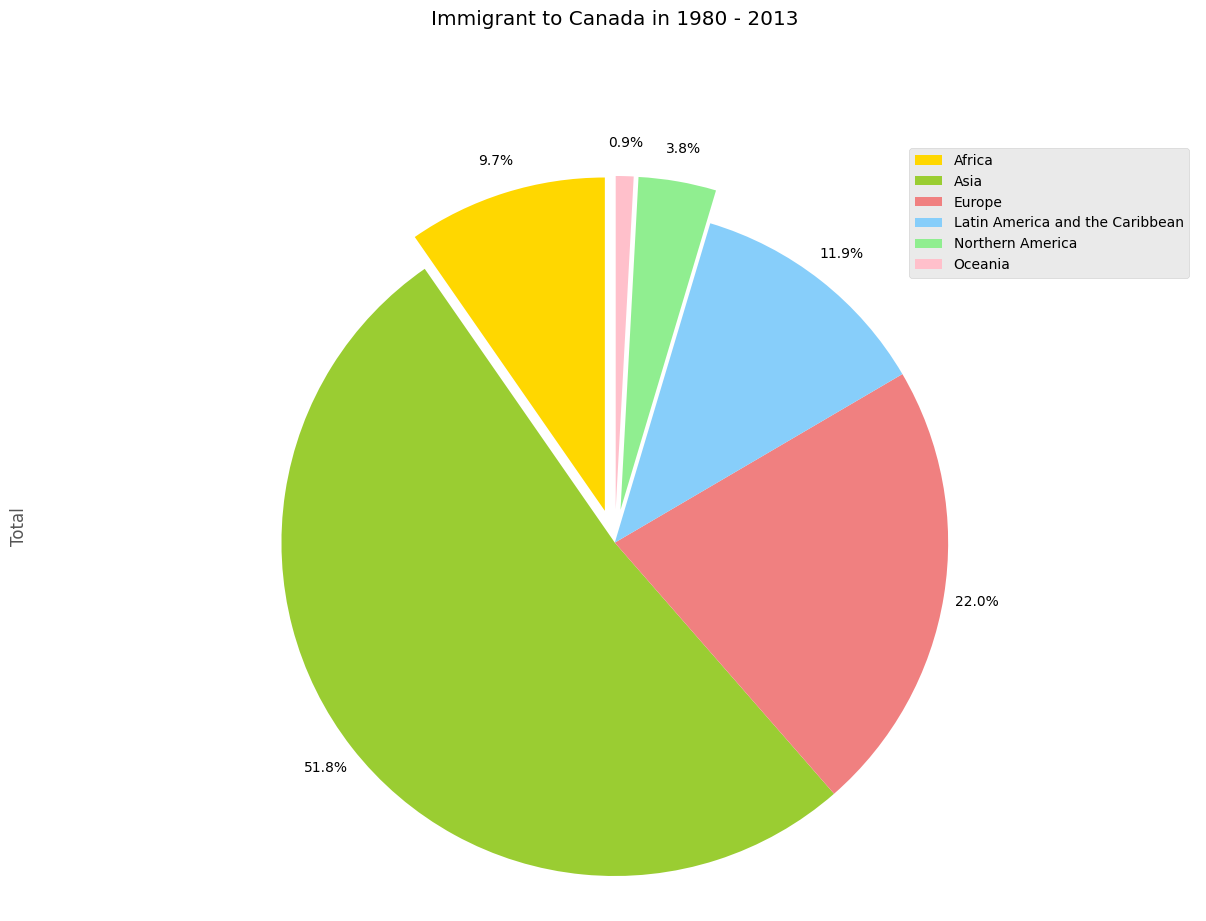

In [19]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continent['Total'].plot(kind = 'pie',
                    figsize = (15,10),
                  startangle = 90,
                  autopct = '%1.1f%%',
                  pctdistance = 1.1,
                  colors = colors_list,
                  explode = explode_list,
                  labels = None)

plt.axis('equal')
plt.title('Immigrant to Canada in 1980 - 2013', y =1.14)
plt.legend(labels = df_continent.index)

Question: Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

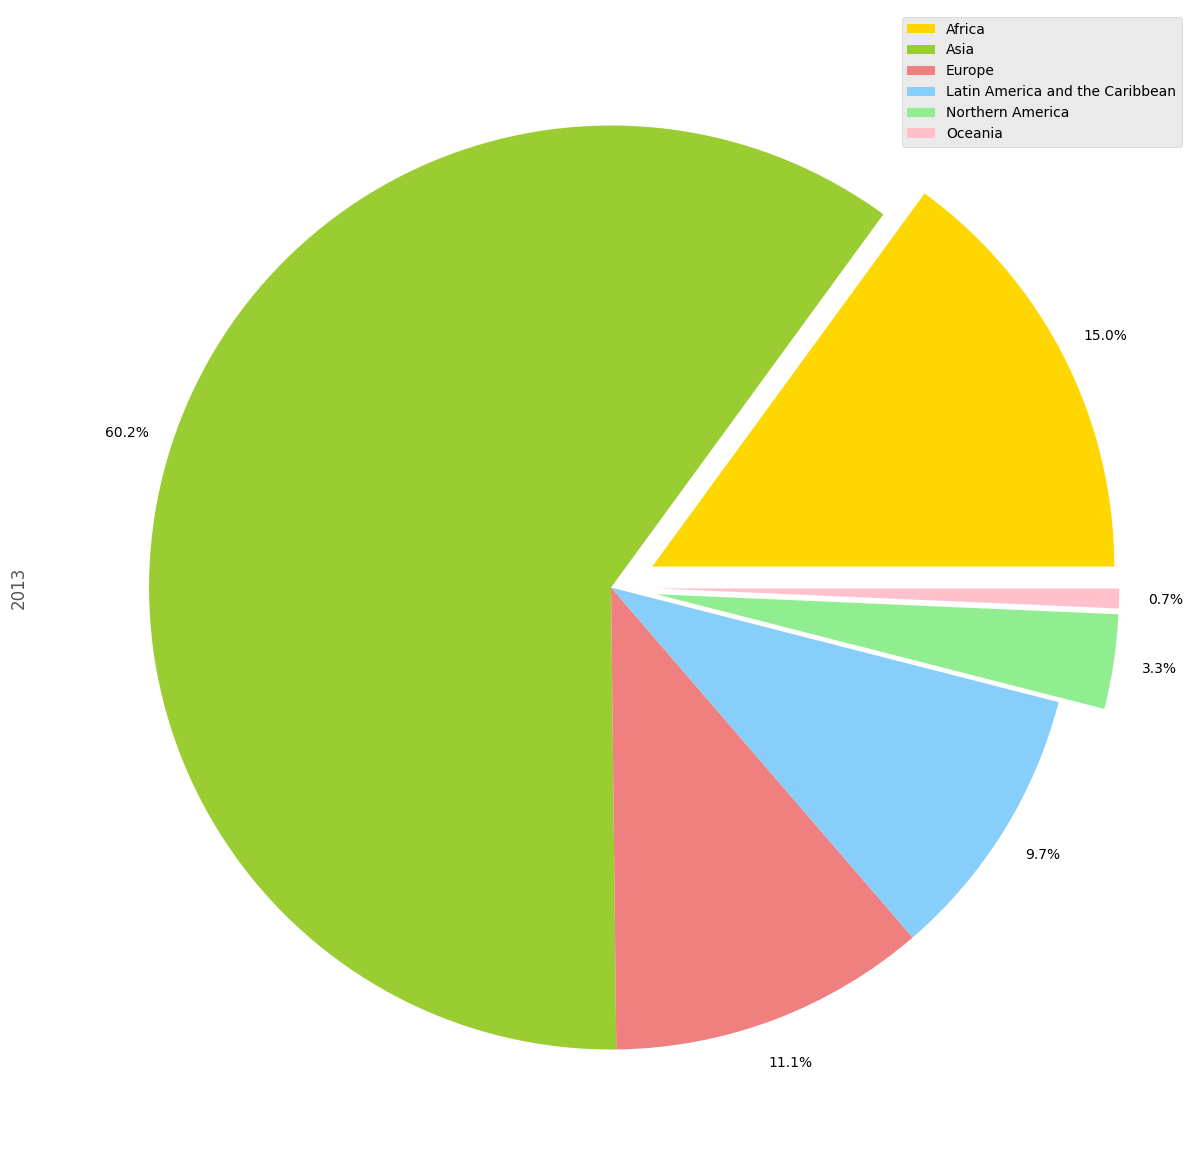

In [25]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continent[2013].plot(kind = 'pie',
                       autopct = '%1.1f%%',
                       pctdistance = 1.1,
                       figsize = (15,15),
                       labels = None,
                       colors = colors_list,
                       explode =explode_list )


plt.legend(labels = df_continent[2013].index)

## Box Plots

plot the box plot for the Japanese immigrants between 1980 - 2013.

In [10]:
df_japan = df_can.loc['Japan',years].transpose()
df_japan.head()

1980    701
1981    756
1982    598
1983    309
1984    246
Name: Japan, dtype: object

Text(0.5, 1.0, 'Immigrant from Japan')

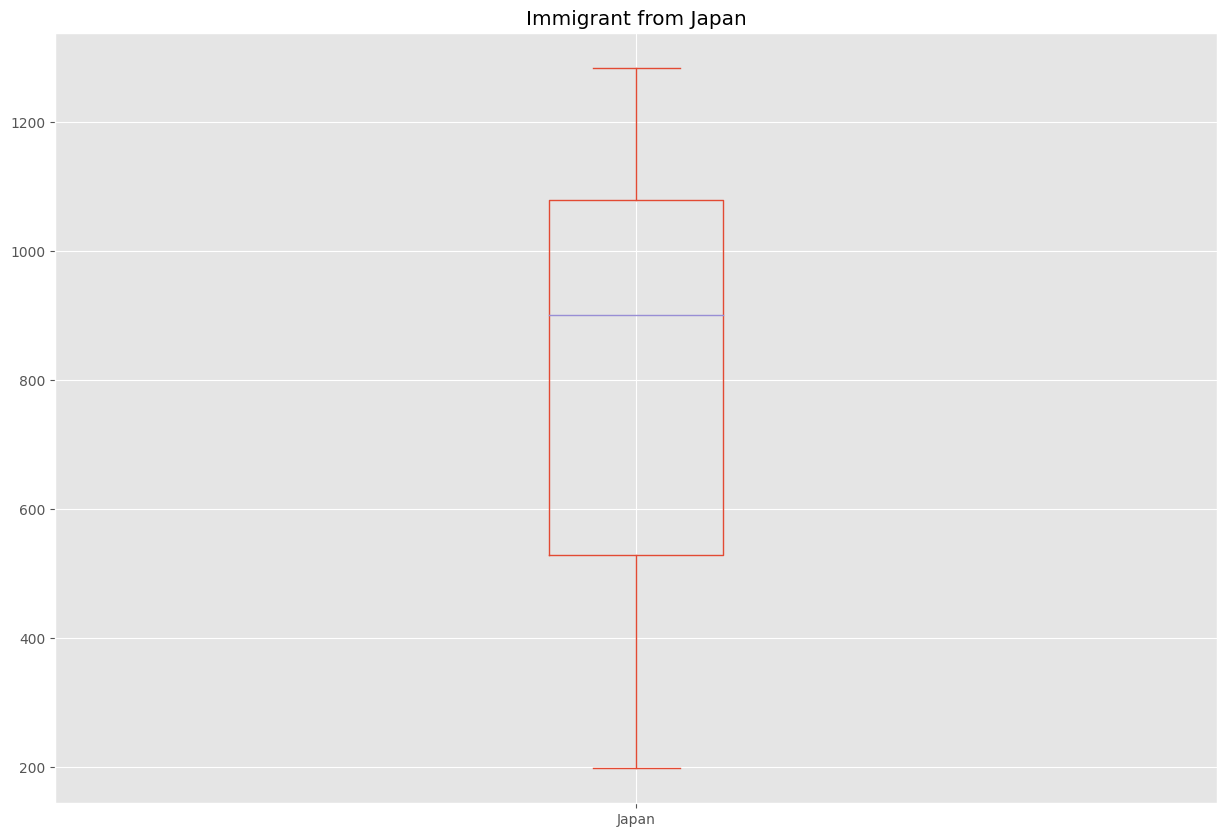

In [12]:
df_japan.plot(kind = 'box', figsize = (15,10))
plt.title('Immigrant from Japan')

Question: Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.

In [20]:
df_CI = df_can.loc[['China','India'],years].transpose()
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


Text(0, 0.5, 'number of immigrants')

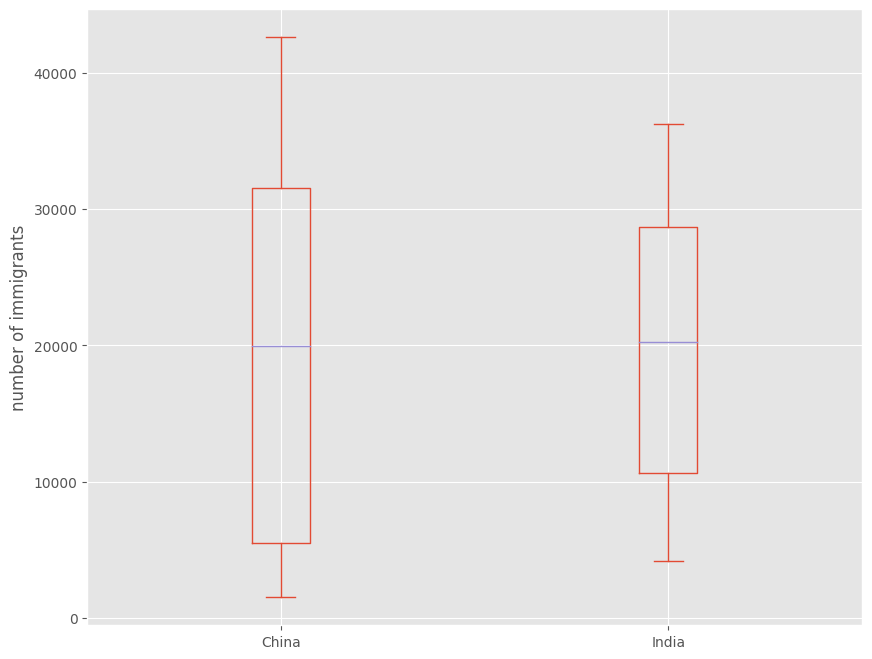

In [31]:
df_CI.plot(kind = 'box',figsize = (10,8))
plt.ylabel('number of immigrants')

### Subplots

Typical syntax is :

In [33]:
### fig = plt.figure()
### ax = fig.add_subplot(nrows,ncols,plot_number)

For example, we might want to perform a side by side comparison of the box plot with the line plot of China and India's immigration.

Text(0, 0.5, 'number of immigrarts')

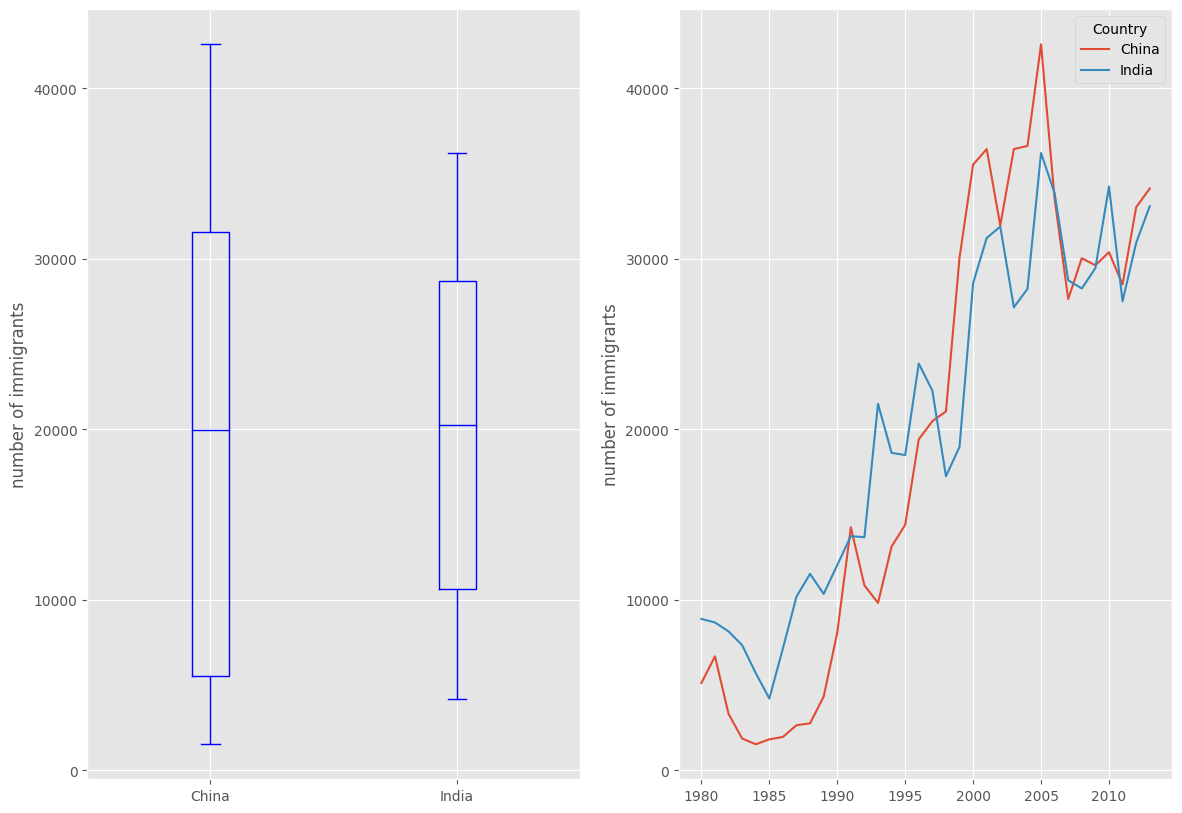

In [35]:
# create box plot and line plot
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

df_CI.plot(kind = 'box',figsize = (14,8), color = 'blue', ax = ax)
ax.set_ylabel('number of immigrants')

df_CI.plot(kind = 'line',figsize = (14,10), ax = ax1)
ax1.set_ylabel('number of immigrarts')

Question: Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the decades 1980s, 1990s, and 2000s.

In [36]:
df_can.sort_values(['Total'],ascending = False,inplace = True)

In [37]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [38]:
years_80 = list(map(int,range(1980,1990)))
years_90 = list(map(int,range(1990,2000)))
years_00 = list(map(int,range(2000,2010)))

df_80 = df_can[years_80].head(15)
df_90 = df_can[years_90].head(15)
df_00 = df_can[years_00].head(15)

df_80 = df_80.sum(axis = 1)
df_90= df_90.sum(axis = 1)
df_00 = df_00.sum(axis = 1)



In [39]:
df_80

Country
India                                                    82154
China                                                    32003
United Kingdom of Great Britain and Northern Ireland    179171
Philippines                                              60764
Pakistan                                                 10591
United States of America                                 76824
Iran (Islamic Republic of)                               21477
Sri Lanka                                                14796
Republic of Korea                                        16259
Poland                                                   57602
Lebanon                                                  24918
France                                                   17137
Jamaica                                                  34328
Viet Nam                                                 30638
Romania                                                   7613
dtype: int64

In [40]:
df_new = pd.DataFrame({'1980s':df_80,'1990s':df_90,'2000s':df_00})

<Axes: >

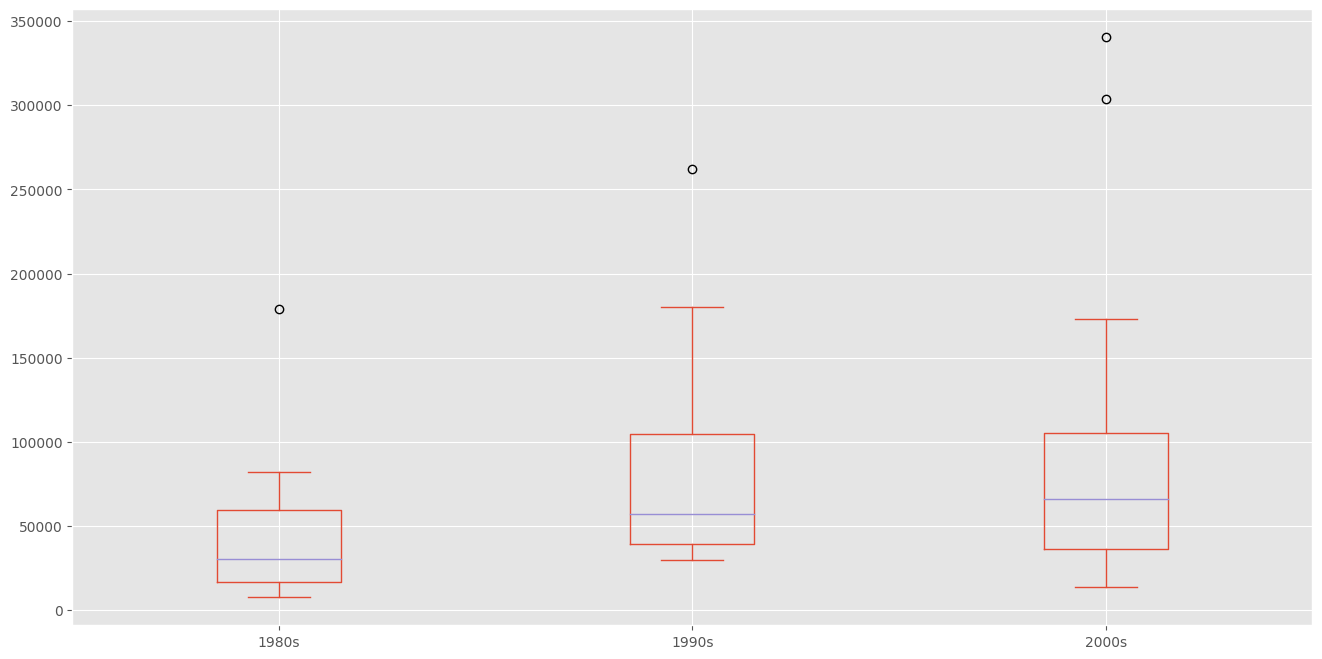

In [41]:
df_new.plot(kind = 'box', figsize = (16,8))

## Scatter Plots

Using a scatter plot, let's visualize the trend of total immigrantion to Canada (all countries combined) for the years 1980 - 2013.

In [42]:
df_tot = pd.DataFrame(df_can[years].sum(axis = 0))

In [43]:
df_tot.index = map(int,df_tot.index)

df_tot.reset_index(inplace = True)
df_tot.columns = ['years','total']

In [44]:
df_tot.head()

,years,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


In [45]:
import seaborn as sns

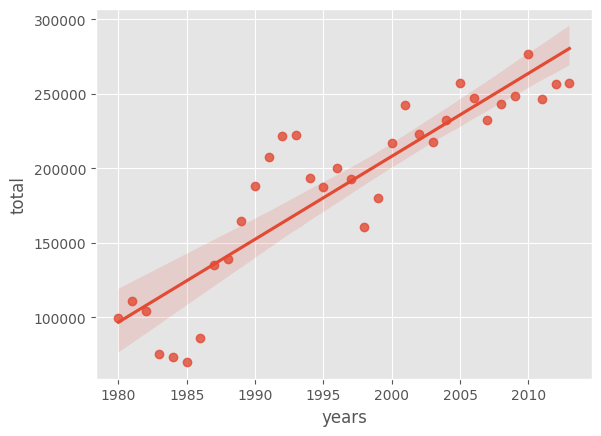

In [50]:
ax = sns.regplot(x= 'years', y = 'total', data = df_tot)

<Axes: xlabel='years', ylabel='total'>

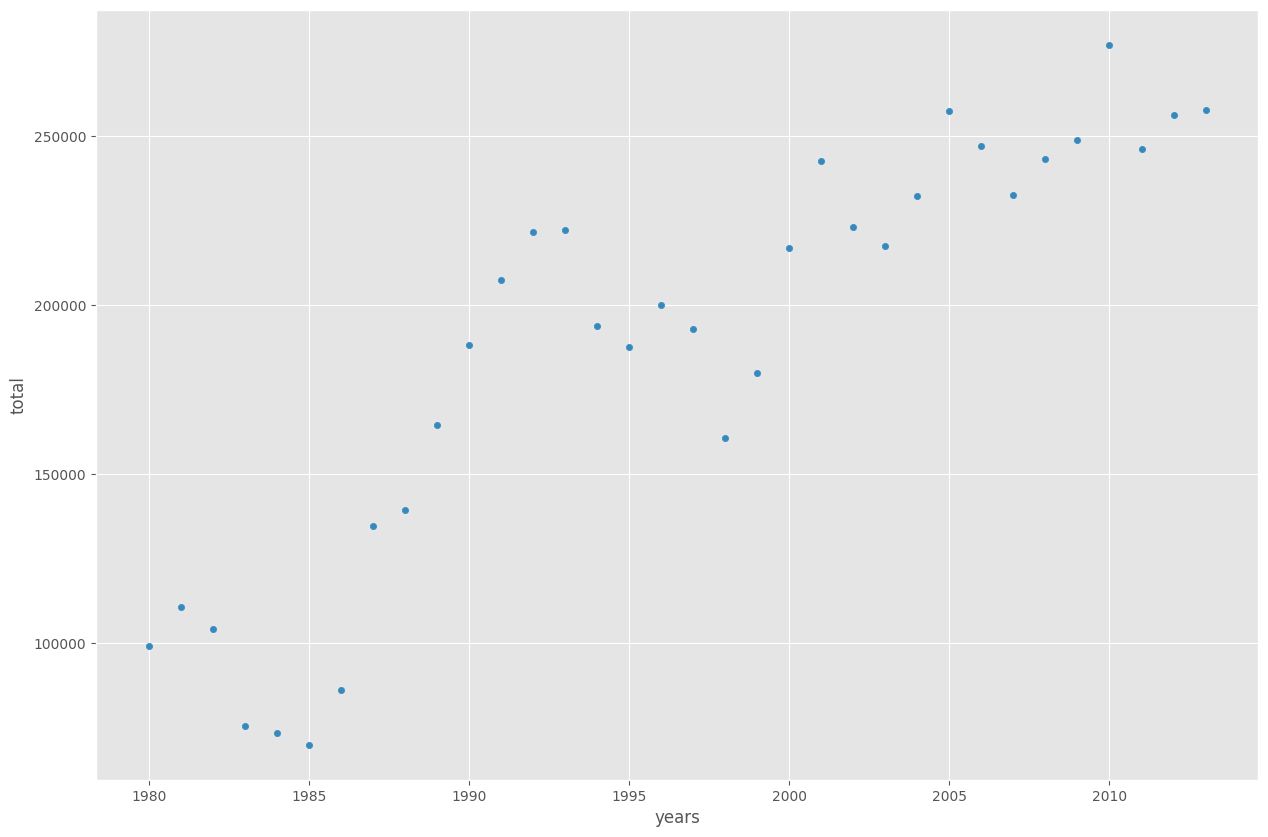

In [52]:
df_tot.plot(kind = 'scatter',x = 'years',y = 'total',figsize = (15,10))


### Question: Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013?

In [54]:
df_dsn = df_can.loc[['Denmark','Norway','Sweden'],years].transpose()
df_dsn['total'] = df_dsn.sum(axis = 1)

In [55]:
df_total = pd.DataFrame(df_dsn['total'])

In [56]:
df_total.reset_index(inplace = True)

In [57]:
df_total.columns = ['years','total']

<Axes: xlabel='years', ylabel='total'>

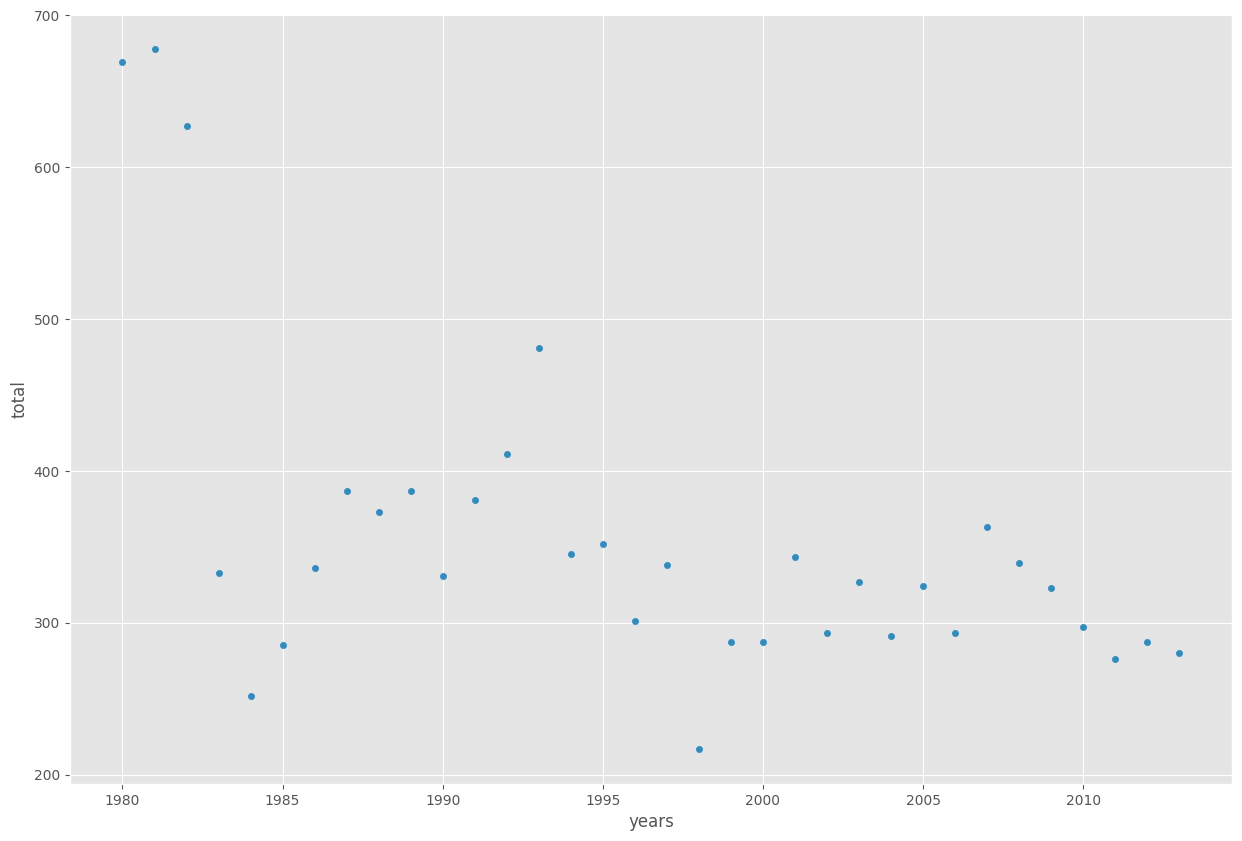

In [60]:
df_total.plot(kind = 'scatter', x = 'years', y= 'total', figsize = (15,10))


## Bubble Plots

A bubble plot is a variation of the scatter plot that displays three dimensions of data (x, y, z). The datapoints are replaced with bubbles, and the size of the bubble is determined by the third variable 'z', also known as the weight. In maplotlib, we can pass in an array or scalar to the keyword s to plot(), that contains the weight of each point.

 Let's do that using a bubble plot of immigration from Brazil and Argentina for the years 1980 - 2013

Step 1: Get the data for Brazil and Argentina. Like in the previous example, we will convert the Years to type int and bring it in the dataframe.

In [ ]:
df_BA = df_can.loc[['Brazil','Argentina'],years].transpose()

In [ ]:
df_BA.index = map(int,df_BA.index)
df_BA.index.name = 'years'

In [ ]:
df_BA.reset_index(inplace = True)

In [ ]:
df_BA.head()

Country,years,Brazil,Argentina
0,1980,211,368
1,1981,220,426
2,1982,192,626
3,1983,139,241
4,1984,145,237


Step 2: Create the normalized weights.
<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/Mod3Fig3FeatureScaling.png" align="center">

In [ ]:
norm_brazil = ((df_BA['Brazil'] - df_BA['Brazil'].min())/(df_BA['Brazil'].max() - df_BA['Argentina'].min()))

norm_Arg = ((df_BA['Argentina'] - df_BA['Argentina'].min())/(df_BA['Argentina'].max() - df_BA['Argentina'].min()))

Step 3: Plot the data.

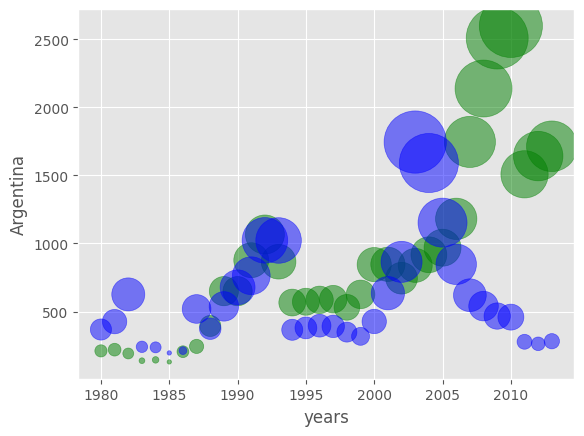

In [ ]:
ax0 = df_BA.plot(kind = 'scatter',
                 x= 'years',
                 y = 'Brazil',
                 color = 'green',
                 s = norm_brazil  * 2000 + 10,
                 alpha = 0.5)

ax1 = df_BA.plot(kind = 'scatter',
                 x = 'years',
                 y = 'Argentina',
                 color = 'blue',
                 alpha = 0.5,
                 s = norm_Arg *2000 +10,
                 ax = ax0)



Question: Previously in this lab, we created box plots to compare immigration from China and India to Canada. Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013. You can use df_can_t that we defined and used in the previous example.

In [ ]:
df_CI = df_can.loc[['China','India'],years].transpose()

In [ ]:
df_CI.index = map(int,df_CI.index)

In [ ]:
df_CI.index.name = 'years'

In [ ]:
df_CI.reset_index(inplace = True)

In [ ]:
norm_cn = ((df_CI['China'] - df_CI['China'].min())/(df_CI['China'].max() - df_CI['China'].min()))

norm_india = ((df_CI['India'] - df_CI['India'].min())/(df_CI['India'].max() - df_CI['India'].min()))

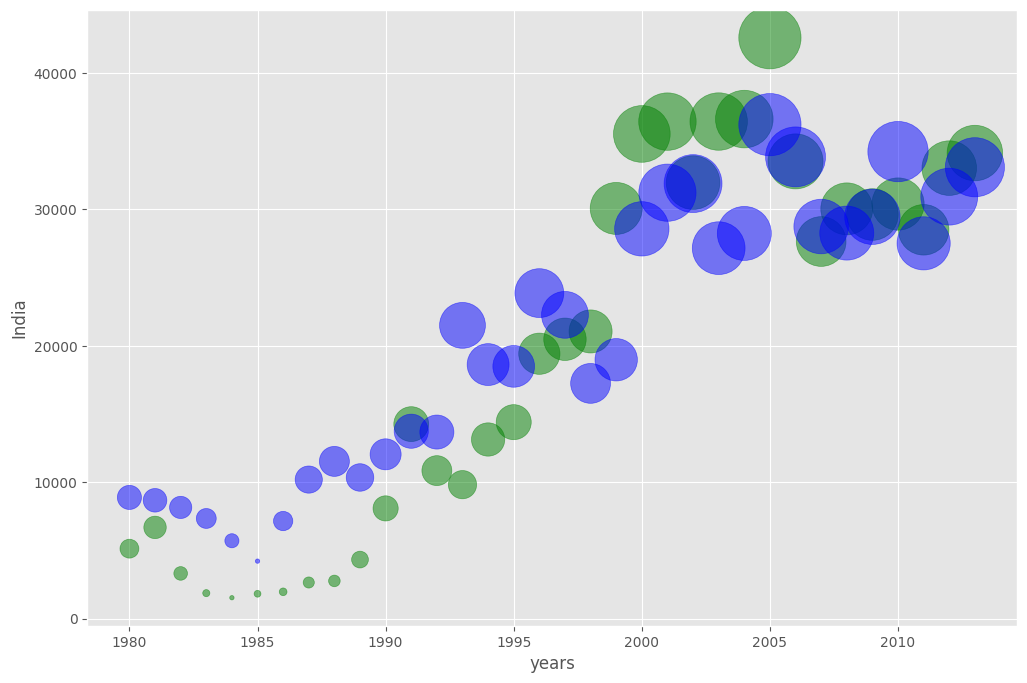

In [ ]:
ax0 = df_CI.plot(kind = 'scatter',
                 x = 'years',
                 y = 'China',
                 figsize = (12,8),
                 color = 'green',
                 alpha = 0.5,
                 s = norm_cn *2000 +10
                 )

ax1 = df_CI.plot(kind = 'scatter',
                 x = 'years',
                 y = 'India',
                 figsize = (12,8),
                 color = 'blue',
                 alpha = 0.5,
                 s = norm_india * 2000 + 10,
                 ax = ax0)